<a href="https://colab.research.google.com/github/GabrielMorais2/analise-tendencias-pobreza/blob/main/mensal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tema

  Pobreza e Extrema Pobreza no Brasil

## Justificativa

  A análise da pobreza e extrema pobreza é um tema de grande relevância social e econômica, especialmente no contexto de políticas públicas voltadas para a redução das desigualdades.

## Conjunto de Dados

  Dados do Cadastro Único e Auxílio Brasil, que incluem informações sobre a população em situação de pobreza, extrema pobreza e vulnerabilidade no Brasil, consolidados mensal e anualmente até 2022.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Carregar o dataset
data = pd.read_csv('indices_pobreza_consolidado.csv')
data.head()


,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,...,familias_vulnerabilidade,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade
0,08/2012,201208,19370363,44381455,63751818,193976530,0.1,0.23,0.33,5265743,...,18162964,14144,86593,100737,7927,57407,65334,119,757,876
1,09/2012,201209,19371279,44554715,63925994,193976530,0.1,0.23,0.33,5278170,...,18284925,14157,87216,101373,8022,58018,66040,123,825,948
2,10/2012,201210,19376665,44652093,64028758,193976530,0.1,0.23,0.33,5288902,...,18365268,14171,87397,101568,8081,58468,66549,131,888,1019
3,11/2012,201211,19381040,44723215,64104255,193976530,0.1,0.23,0.33,5298295,...,18429654,14182,87697,101879,8198,59193,67391,142,925,1067
4,12/2012,201212,19392882,44684759,64077641,193976530,0.1,0.23,0.33,5311337,...,18472436,14209,87820,102029,8314,60250,68564,143,978,1121


Pré-processamento dos Dados:



*  Limpeza dos dados
*  Preparação dos dados



In [ ]:
# Tratar valores ausentes (se houver)
data = data.dropna()

# Converter a coluna 'referencia' para formato de data
data['referencia'] = pd.to_datetime(data['referencia'], format='%m/%Y')

# Verificar valores duplicados
print(data.duplicated().sum())

# Remover duplicados (se houver)
data = data.drop_duplicates()

#Removendo coluna de periodo
data.drop(columns='periodo', inplace=True)

0


A análise estatística descritiva é uma técnica essencial para compreender as características principais de um conjunto de dados. Nesta análise, utilizamos várias medidas estatísticas para explorar as variáveis pobreza, extrema_pobreza e familias_pobreza. Estas medidas incluem a média, mediana, moda, desvio padrão, variância, amplitude interquartílica (IQR) e coeficiente de assimetria (skewness). A seguir, explicamos cada uma dessas medidas e analisamos os resultados obtidos.


Médias:
 pobreza             1.294801e+07
extrema_pobreza     4.123146e+07
familias_pobreza    3.865711e+06
dtype: float64

Medianas:
 pobreza             12248774.5
extrema_pobreza     39777429.5
familias_pobreza     3668067.5
dtype: float64

Modas:
 pobreza              8454642
extrema_pobreza     36803455
familias_pobreza     2746503
Name: 0, dtype: int64

Desvios Padrão:
 pobreza             4.046276e+06
extrema_pobreza     3.015699e+06
familias_pobreza    9.582630e+05
dtype: float64

Variâncias:
 pobreza             1.637235e+13
extrema_pobreza     9.094442e+12
familias_pobreza    9.182680e+11
dtype: float64

Amplitudes Interquartílicas:
 pobreza             6473702.75
extrema_pobreza     5502047.25
familias_pobreza    1451474.75
dtype: float64

Coeficientes de Assimetria:
 pobreza             0.469122
extrema_pobreza     0.701552
familias_pobreza    0.499179
dtype: float64


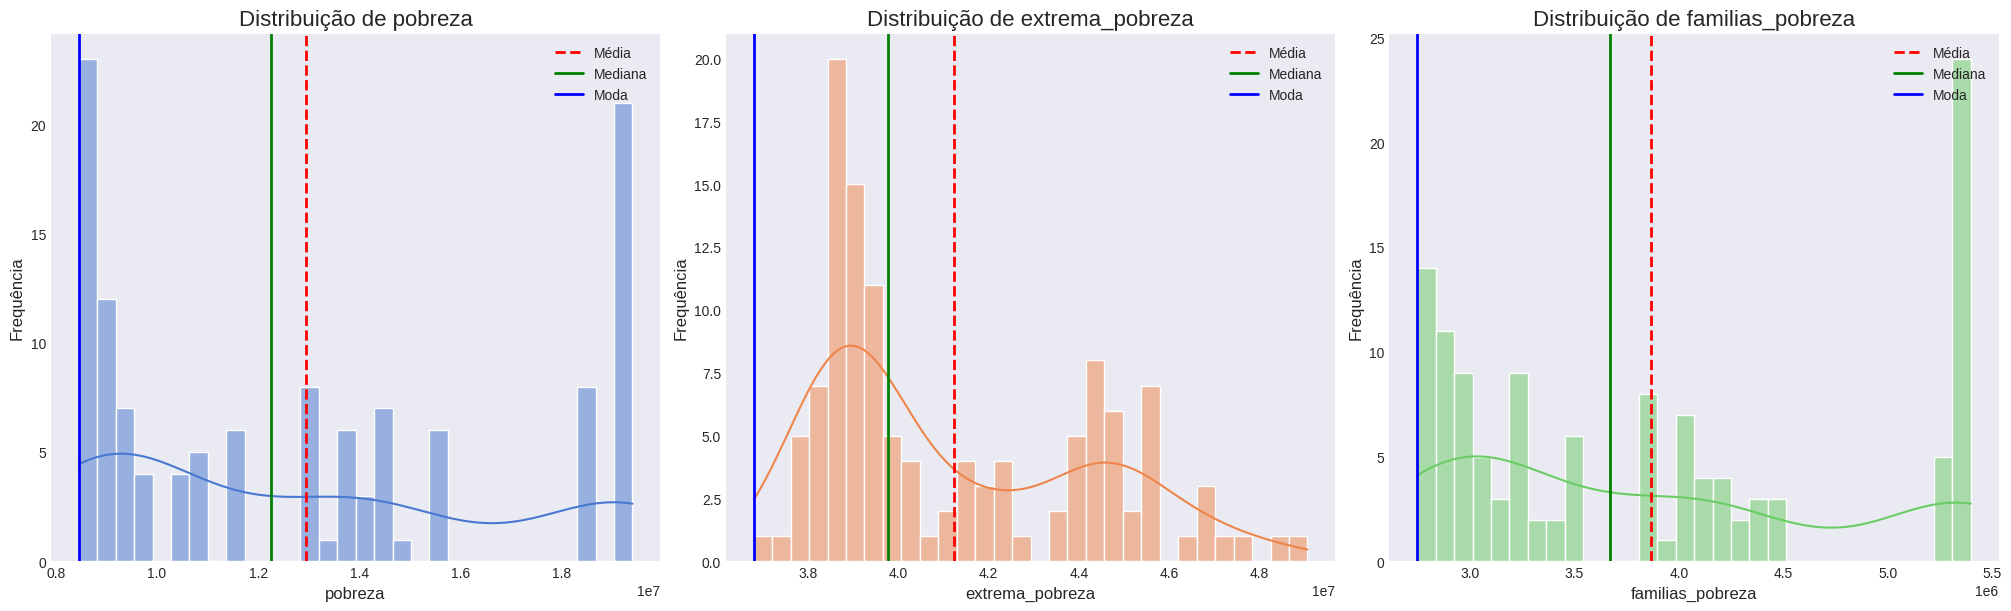

In [ ]:
# Selecionar as variáveis de interesse
variables = ['pobreza', 'extrema_pobreza', 'familias_pobreza']

# Calcular a média
means = data[variables].mean()
# Calcular a mediana
medians = data[variables].median()
# Calcular a moda
modes = data[variables].mode().iloc[0]

print("Médias:\n", means)
print("\nMedianas:\n", medians)
print("\nModas:\n", modes)

# Medidas de dispersão
# Calcular o desvio padrão
std_devs = data[variables].std()
# Calcular a variância
variances = data[variables].var()
# Calcular a amplitude interquartílica (IQR)
iqrs = data[variables].quantile(0.75) - data[variables].quantile(0.25)

print("\nDesvios Padrão:\n", std_devs)
print("\nVariâncias:\n", variances)
print("\nAmplitudes Interquartílicas:\n", iqrs)

# Medidas de assimetria
skewness = data[variables].skew()

print("\nCoeficientes de Assimetria:\n", skewness)

# Define uma paleta de cores personalizada
palette = sns.color_palette("muted")

# Criar subplots para visualizar todas as distribuições em um único gráfico
fig, axs = plt.subplots(1, len(variables), figsize=(20, 6), constrained_layout=True)

for i, var in enumerate(variables):
    sns.histplot(data[var], bins=30, kde=True, color=palette[i], ax=axs[i])
    axs[i].axvline(means[var], color='r', linestyle='--', linewidth=2, label='Média')
    axs[i].axvline(medians[var], color='g', linestyle='-', linewidth=2, label='Mediana')
    axs[i].axvline(modes[var], color='b', linestyle='-', linewidth=2, label='Moda')
    axs[i].set_title(f'Distribuição de {var}', fontsize=16)
    axs[i].set_xlabel(var, fontsize=12)
    axs[i].set_ylabel('Frequência', fontsize=12)
    axs[i].legend()
    axs[i].grid(False)

plt.show()

Análise Temporal

Plotar gráficos de linha para visualizar a evolução dos números ao longo do tempo. (essoas em situação de pobreza, extrema pobreza e vulnerabilidade em relação à população estimada)

<ipython-input-90-d081b4eccb11>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


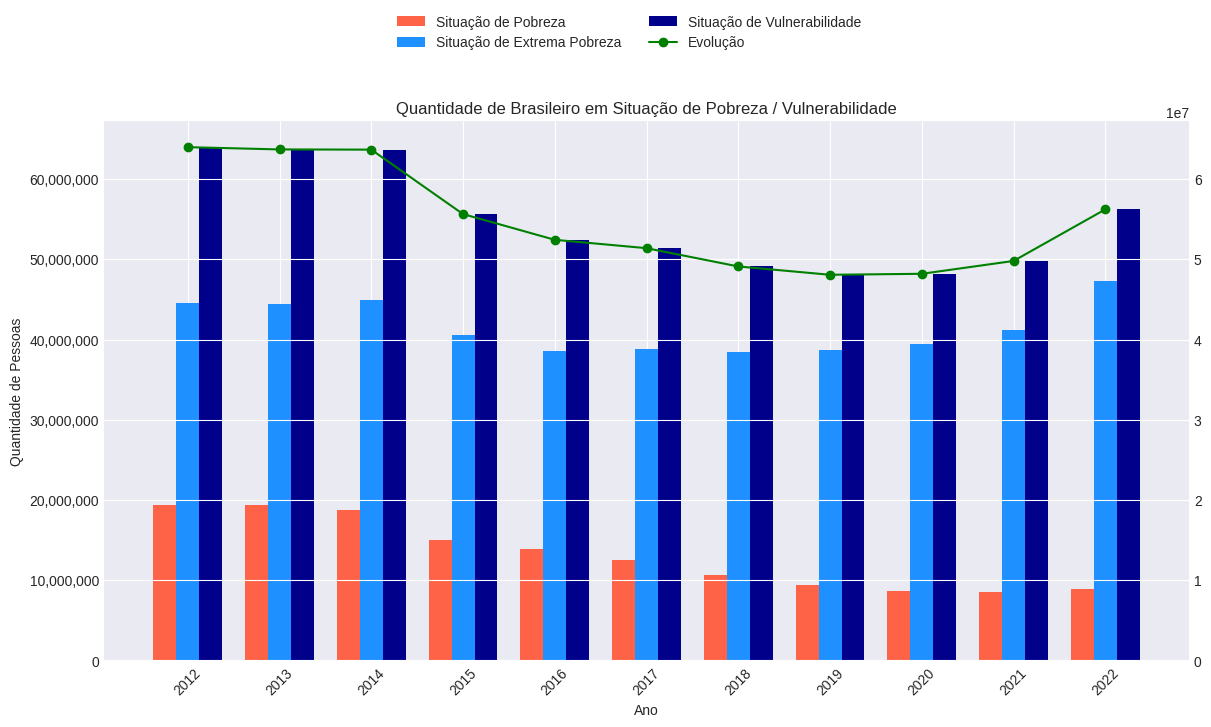

In [ ]:


# Agrupar os dados por ano e calcular a média
data['ano'] = data['referencia'].dt.year
data_agg = data.groupby('ano').mean().reset_index()

# Configurar o estilo dos gráficos
plt.style.use('seaborn-darkgrid')

# Criar o gráfico de barras com a linha de evolução
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráficos de Barras
width = 0.25  # Largura das barras
x = np.arange(len(data_agg['ano']))  # posições dos anos

bars1 = ax1.bar(x - width, data_agg['pobreza'], width, label='Situação de Pobreza', color='tomato')
bars2 = ax1.bar(x, data_agg['extrema_pobreza'], width, label='Situação de Extrema Pobreza', color='dodgerblue')
bars3 = ax1.bar(x + width, data_agg['total'], width, label='Situação de Vulnerabilidade', color='darkblue')

# Adicionar rótulos e título
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade de Pessoas')
ax1.set_title('Quantidade de Brasileiro em Situação de Pobreza / Vulnerabilidade')
ax1.set_xticks(x)
ax1.set_xticklabels(data_agg['ano'], rotation=45)

ax1.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))
)

# Linha de Evolução
ax2 = ax1.twinx()
line, = ax2.plot(x, data_agg['total'], color='green', marker='o', linestyle='-', label='Evolução')

# Ajustar limite do eixo y do ax2 para melhor visualização
ax2.set_ylim(ax1.get_ylim())

# Adicionar uma legenda para as barras e a linha de evolução
fig.legend([bars1, bars2, bars3, line], ['Situação de Pobreza', 'Situação de Extrema Pobreza', 'Situação de Vulnerabilidade', 'Evolução'],
           loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.show()

Análise por Grupos Específicos

Evolução da Quantidade de Familia Indigenas em Situação de Pobreza / Extrema Pobreza (2012-2022)
O gráfico apresenta a evolução da quantidade de famílias indígenas em situação de pobreza e extrema pobreza no Brasil ao longo dos anos, de 2012 a 2022.


<ipython-input-66-0fb35fc87b55>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


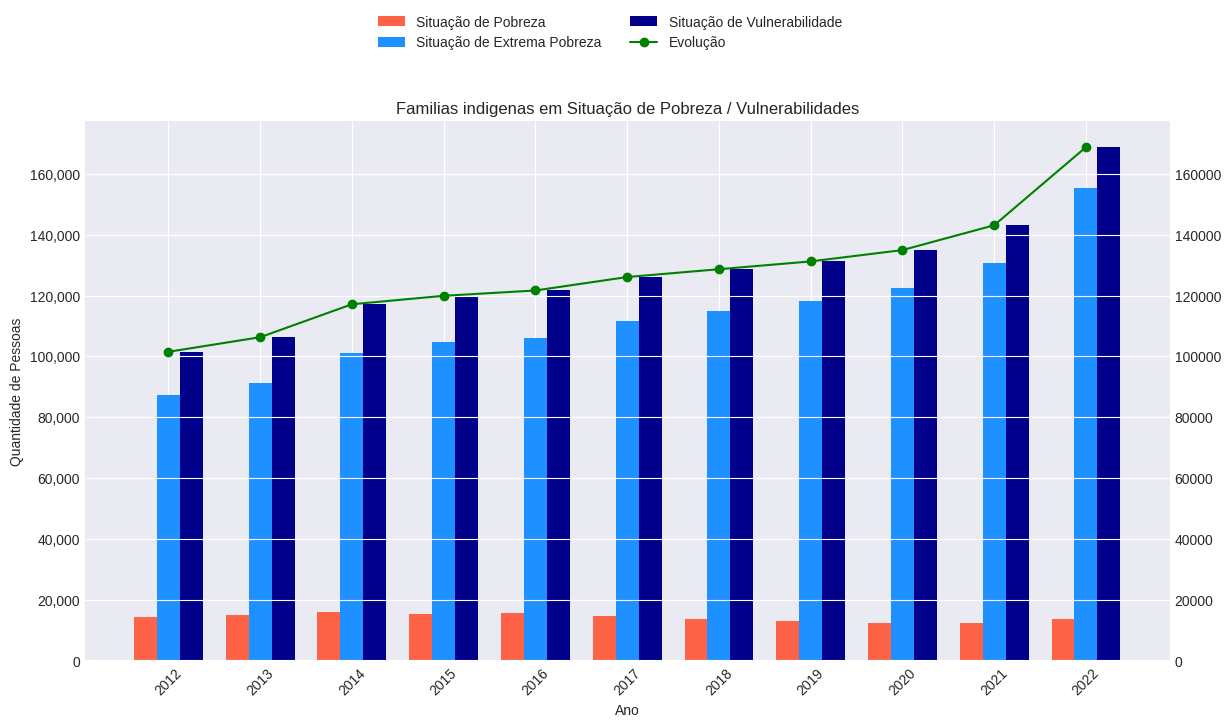

In [ ]:
# Agrupar os dados por ano e calcular a média
data['ano'] = data['referencia'].dt.year
data_agg = data.groupby('ano').mean().reset_index()

# Configurar o estilo dos gráficos
plt.style.use('seaborn-darkgrid')

# Criar o gráfico de barras com a linha de evolução
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráficos de Barras
width = 0.25  # Largura das barras
x = np.arange(len(data_agg['ano']))  # posições dos anos

bars1 = ax1.bar(x - width, data_agg['indigenas_pobreza'], width, label='Familias Indigenas - Situação de Pobreza', color='tomato')
bars2 = ax1.bar(x, data_agg['indigenas_extrema_pobreza'], width, label='Familias Indigenas - Situação de Extrema Pobreza', color='dodgerblue')
bars3 = ax1.bar(x + width, data_agg['indigenas_vulnerabilidade'], width, label='Familias Indigenas - Situação de Vulnerabilidade', color='darkblue')

# Adicionar rótulos e título
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade de Pessoas')
ax1.set_title('Familias indigenas em Situação de Pobreza / Vulnerabilidades')
ax1.set_xticks(x)
ax1.set_xticklabels(data_agg['ano'], rotation=45)

ax1.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))
)

# Linha de Evolução
ax2 = ax1.twinx()
line, = ax2.plot(x, data_agg['indigenas_vulnerabilidade'], color='green', marker='o', linestyle='-', label='Evolução')

# Ajustar limite do eixo y do ax2 para melhor visualização
ax2.set_ylim(ax1.get_ylim())

# Adicionar uma legenda para as barras e a linha de evolução
fig.legend([bars1, bars2, bars3, line], ['Situação de Pobreza', 'Situação de Extrema Pobreza', 'Situação de Vulnerabilidade', 'Evolução'],
           loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.show()

Análise por Grupos Específicos

Evolução da Quantidade de Familia Quilombolas em Situação de Pobreza / Extrema Pobreza (2012-2022)
O gráfico apresenta a evolução da quantidade de famílias Quilombolas em situação de pobreza e extrema pobreza no Brasil ao longo dos anos, de 2012 a 2022.


<ipython-input-67-d4277fd4292c>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


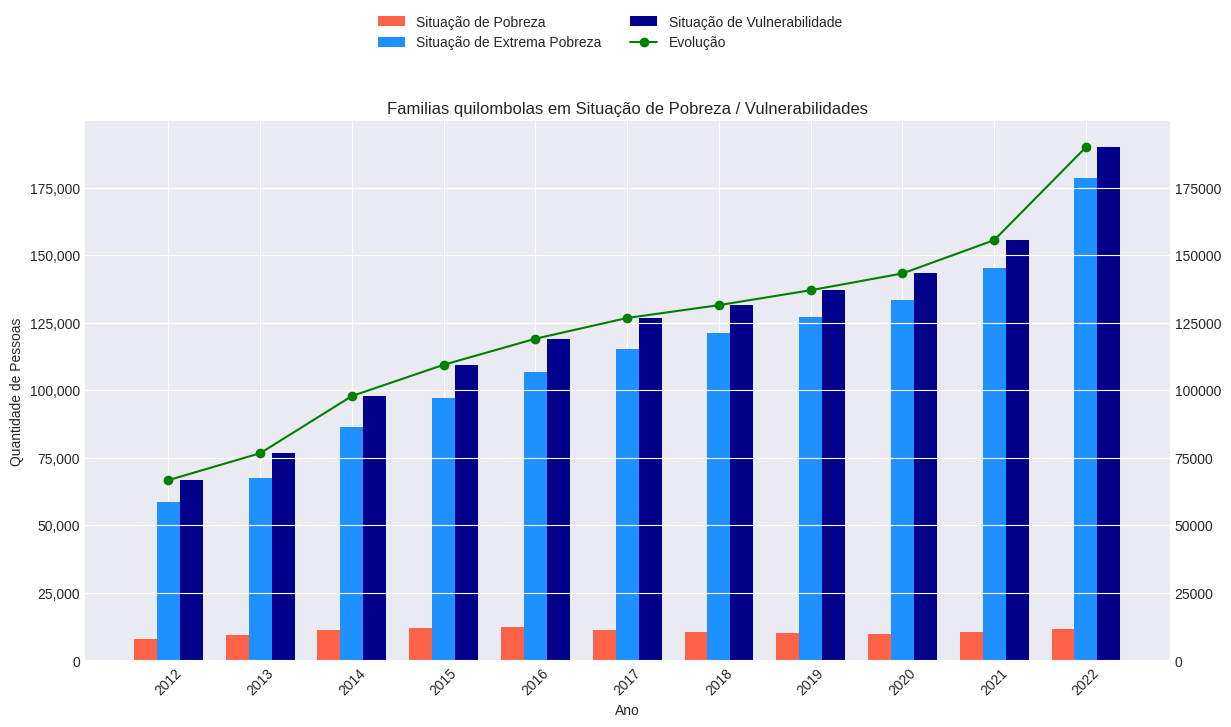

In [ ]:
# Agrupar os dados por ano e calcular a média
data['ano'] = data['referencia'].dt.year
data_agg = data.groupby('ano').mean().reset_index()

# Configurar o estilo dos gráficos
plt.style.use('seaborn-darkgrid')

# Criar o gráfico de barras com a linha de evolução
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráficos de Barras
width = 0.25  # Largura das barras
x = np.arange(len(data_agg['ano']))  # posições dos anos

bars1 = ax1.bar(x - width, data_agg['quilombolas_pobreza'], width, label='Familias quilombolas - Situação de Pobreza', color='tomato')
bars2 = ax1.bar(x, data_agg['quilombolas_extrema_pobreza'], width, label='Familias quilombolas - Situação de Extrema Pobreza', color='dodgerblue')
bars3 = ax1.bar(x + width, data_agg['quilombolas_vulnerabilidade'], width, label='Familias quilombolas - Situação de Vulnerabilidade', color='darkblue')

# Adicionar rótulos e título
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade de Pessoas')
ax1.set_title('Familias quilombolas em Situação de Pobreza / Vulnerabilidades')
ax1.set_xticks(x)
ax1.set_xticklabels(data_agg['ano'], rotation=45)

ax1.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))
)

# Linha de Evolução
ax2 = ax1.twinx()
line, = ax2.plot(x, data_agg['quilombolas_vulnerabilidade'], color='green', marker='o', linestyle='-', label='Evolução')

# Ajustar limite do eixo y do ax2 para melhor visualização
ax2.set_ylim(ax1.get_ylim())

# Adicionar uma legenda para as barras e a linha de evolução
fig.legend([bars1, bars2, bars3, line], ['Situação de Pobreza', 'Situação de Extrema Pobreza', 'Situação de Vulnerabilidade', 'Evolução'],
           loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.show()

Análise por Grupos Específicos

Evolução da Quantidade de Familia Ciganos em Situação de Pobreza / Extrema Pobreza (2012-2022)
O gráfico apresenta a evolução da quantidade de famílias Ciganos em situação de pobreza e extrema pobreza no Brasil ao longo dos anos, de 2012 a 2022.


<ipython-input-68-b9d1da61858f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


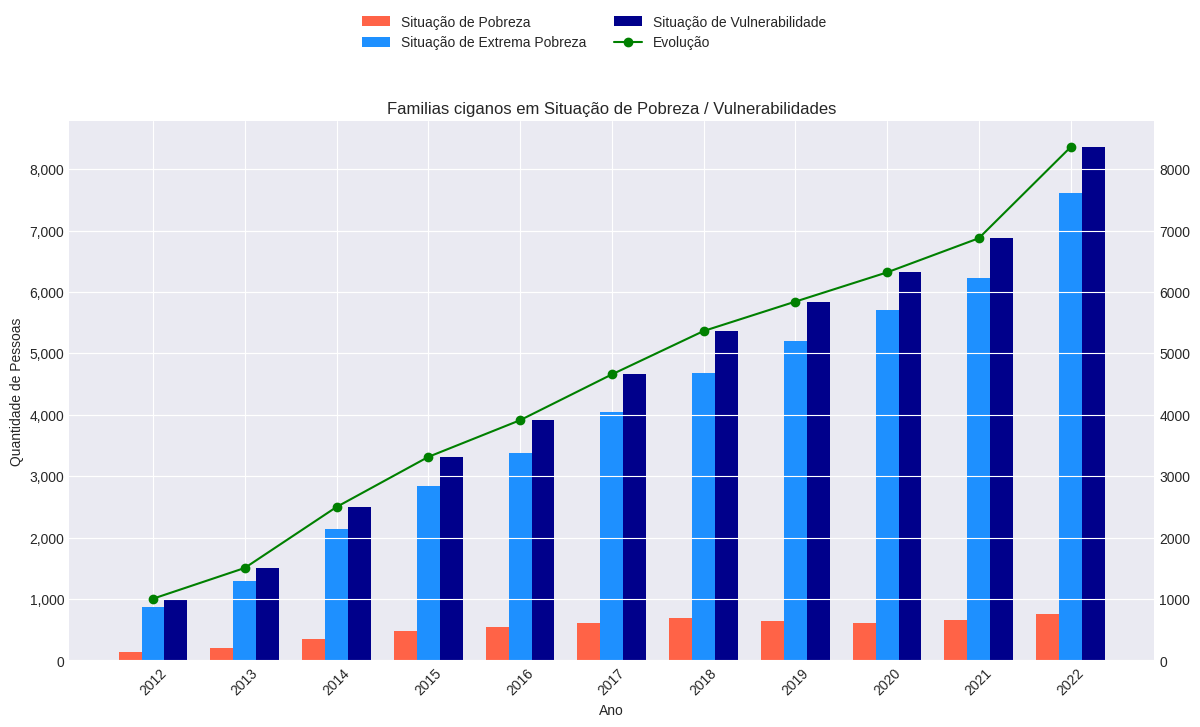

In [ ]:
# Agrupar os dados por ano e calcular a média
data['ano'] = data['referencia'].dt.year
data_agg = data.groupby('ano').mean().reset_index()

# Configurar o estilo dos gráficos
plt.style.use('seaborn-darkgrid')

# Criar o gráfico de barras com a linha de evolução
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráficos de Barras
width = 0.25  # Largura das barras
x = np.arange(len(data_agg['ano']))  # posições dos anos

bars1 = ax1.bar(x - width, data_agg['ciganos_pobreza'], width, label='Familias ciganos - Situação de Pobreza', color='tomato')
bars2 = ax1.bar(x, data_agg['ciganos_extrema_pobreza'], width, label='Familias ciganos - Situação de Extrema Pobreza', color='dodgerblue')
bars3 = ax1.bar(x + width, data_agg['ciganos_vulnerabilidade'], width, label='Familias ciganos - Situação de Vulnerabilidade', color='darkblue')

# Adicionar rótulos e título
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade de Pessoas')
ax1.set_title('Familias ciganos em Situação de Pobreza / Vulnerabilidades')
ax1.set_xticks(x)
ax1.set_xticklabels(data_agg['ano'], rotation=45)

ax1.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))
)

# Linha de Evolução
ax2 = ax1.twinx()
line, = ax2.plot(x, data_agg['ciganos_vulnerabilidade'], color='green', marker='o', linestyle='-', label='Evolução')

# Ajustar limite do eixo y do ax2 para melhor visualização
ax2.set_ylim(ax1.get_ylim())

# Adicionar uma legenda para as barras e a linha de evolução
fig.legend([bars1, bars2, bars3, line], ['Situação de Pobreza', 'Situação de Extrema Pobreza', 'Situação de Vulnerabilidade', 'Evolução'],
           loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.show()

Evolução da porcentagem da população em Situação de Pobreza / Extrema Pobreza (2012-2022)
Os gráficos mostram a evolução da porcentagem da população em situação de pobreza e extrema pobreza ao longo dos anos, de 2013 a 2022.


<ipython-input-73-b97d34e38283>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


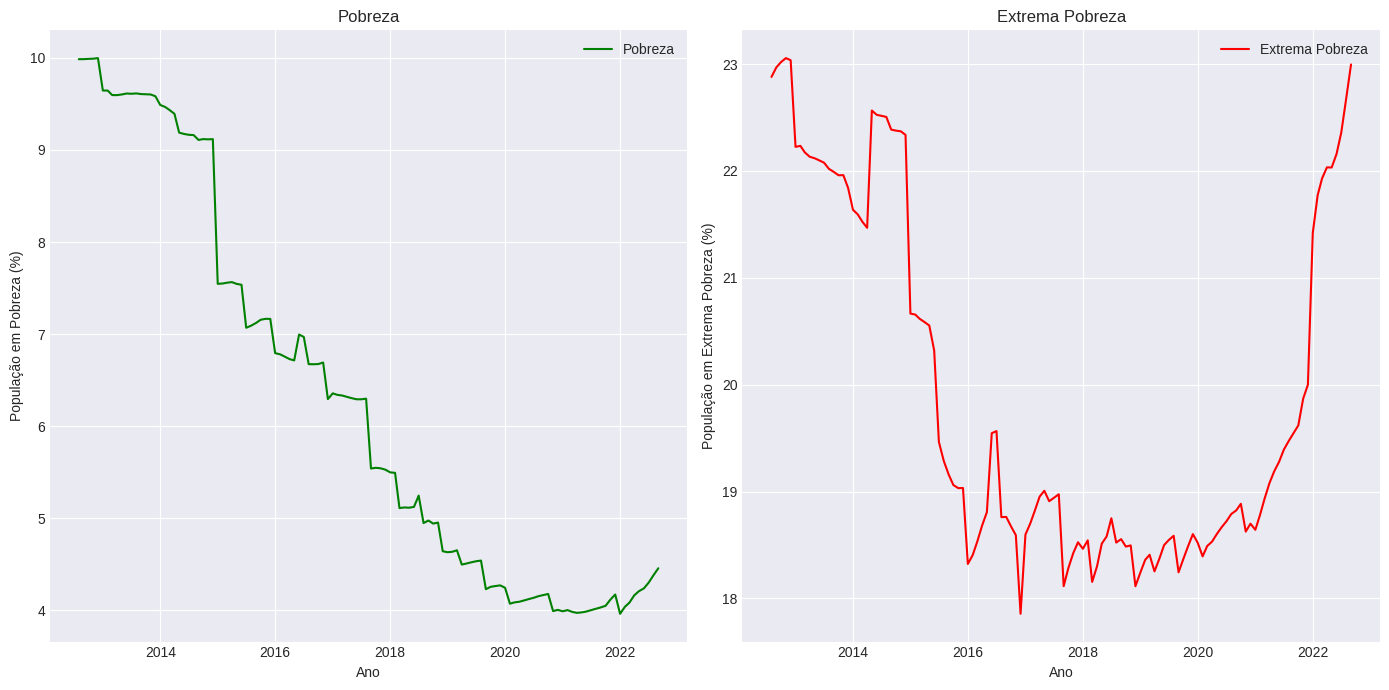

In [ ]:
data['porcentagem_pobreza'] = (data['pobreza'] / data['populacao_estimada']) * 100
data['porcentagem_extrema_pobreza'] = (data['extrema_pobreza'] / data['populacao_estimada']) * 100
data['total_em_pobreza'] = (data['total'] / data['populacao_estimada']) * 100

# Configurar o estilo dos gráficos
plt.style.use('seaborn-darkgrid')

# Criar os subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plotar o gráfico de pobreza
axs[0].plot(data['referencia'], data['porcentagem_pobreza'], linestyle='-', color='green', label='Pobreza')
axs[0].set_title('Pobreza')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('População em Pobreza (%)')
axs[0].legend(loc='best')

# Plotar o gráfico de extrema pobreza
axs[1].plot(data['referencia'], data['porcentagem_extrema_pobreza'], linestyle='-', color='red', label='Extrema Pobreza')
axs[1].set_title('Extrema Pobreza')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('População em Extrema Pobreza (%)')
axs[1].legend(loc='best')

# Ajustar o layout
plt.tight_layout()
plt.show()